In [345]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import statistics
import seaborn as sns
%matplotlib inline
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
import plotly.express as px
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder

Overview

In [346]:
data=pd.read_csv("data/nba2k-full.csv")

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [348]:
display(data.head())

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [349]:
display(data.isna().sum())

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64

In [350]:
# "jersey" sütunundaki "#" sembolünü kaldırma

data['jersey'] = data['jersey'].str.replace('#', '')
display(data['jersey'].head(30))

0     23
1      2
2     34
3      7
4     13
5     30
6      3
7     13
8      0
9     21
10    11
11    15
12     0
13    11
14    32
15    22
16    27
17    23
18    45
19     8
20    77
21    12
22     3
23    10
24    10
25     3
26     4
27     6
28     0
29    43
Name: jersey, dtype: object

In [351]:
# "full_name" sütununun adını "player_name" olarak değiştirme

data.rename(columns={'full_name': 'player_name'}, inplace=True)
display(data.head())

,player_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [352]:
# Sütunların isimleri

display(f'There are {data.shape[0]} rows and {data.shape[1]} columns.\n')
display(f'Column names: {data.columns.values}')

'There are 464 rows and 15 columns.\n'

"Column names: ['player_name' 'rating' 'jersey' 'team' 'position' 'b_day' 'height'\n 'weight' 'salary' 'country' 'draft_year' 'draft_round' 'draft_peak'\n 'college' 'version']"

VERİ TEMİZLEME

In [353]:
# height sütununu düzenleme

data['height'] = data['height'].apply(lambda x: float(x.split('/')[-1].strip()) if '/' in x else (int(x.split('-')[0]) * 0.3048) + (int(x.split('-')[1]) * 0.0254))
display(data)

,player_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,3,Oklahoma City Thunder,G,05/06/85,1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,3,Washington Wizards,G,06/28/93,1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,27,Utah Jazz,C,06/26/92,2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,7,Toronto Raptors,G,03/25/86,1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [354]:
# height başlığını değiştirme

data.rename(columns={'height': 'height_m'}, inplace=True)
# height sütununu düzenlemedisplay(data)

In [355]:
# weight sütununu düzenleme

data['weight'] = data['weight'].apply(lambda x: float(x.split('/')[-1].split()[0]) if '/' in x else float(x))
display(data)

,player_name,rating,jersey,team,position,b_day,height_m,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,113.4,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,102.1,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,104.3,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,99.8,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,3,Oklahoma City Thunder,G,05/06/85,1.85,79.4,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,3,Washington Wizards,G,06/28/93,1.91,93.9,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,27,Utah Jazz,C,06/26/92,2.16,108.0,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,7,Toronto Raptors,G,03/25/86,1.83,93.0,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [356]:
# weight başlığını değiştirme

data.rename(columns={'weight': 'weight_kg'}, inplace=True)
display(data)

,player_name,rating,jersey,team,position,b_day,height_m,weight_kg,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,23,Los Angeles Lakers,F,12/30/84,2.06,113.4,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,06/29/91,2.01,102.1,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,12/06/94,2.11,109.8,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,7,Brooklyn Nets,F,09/29/88,2.08,104.3,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,13,Houston Rockets,G,08/26/89,1.96,99.8,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,3,Oklahoma City Thunder,G,05/06/85,1.85,79.4,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,3,Washington Wizards,G,06/28/93,1.91,93.9,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,27,Utah Jazz,C,06/26/92,2.16,108.0,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,7,Toronto Raptors,G,03/25/86,1.83,93.0,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [357]:
# 'salary' sütunundaki verilerin başındaki "$" sembolünü kaldırma

data['salary'] = data['salary'].str.replace('$', '').astype(float)
display(data['salary'].head())

0    37436858.0
1    32742000.0
2    25842697.0
3    37199000.0
4    38199000.0
Name: salary, dtype: float64

In [358]:
# College kısmı boş olanları No College olarak doldurma

data['college'].fillna('No College', inplace=True)
no_college_players = data[data['college'] == 'No College']
display(no_college_players[['player_name', 'college']].head(5))

,player_name,college
0,LeBron James,No College
2,Giannis Antetokounmpo,No College
11,Nikola Jokic,No College
16,Rudy Gobert,No College
20,Luka Doncic,No College


In [359]:
# Veri Tipleri

data.dtypes

player_name     object
rating           int64
jersey          object
team            object
position        object
b_day           object
height_m       float64
weight_kg      float64
salary         float64
country         object
draft_year       int64
draft_round     object
draft_peak      object
college         object
version         object
dtype: object

Veri Analizi

In [360]:
unique_versions = data['version'].unique()
display(unique_versions)

array(['NBA2k20', 'NBA2k21', 'NBA2k22'], dtype=object)

In [361]:
# Tüm oyuncuların ortalama performansları

average_rating = data['rating'].mean()
display(f'Total average rating value: {round(average_rating, 1)}')

'Total average rating value: 77.6'

In [362]:
# Her bir oyuncunun adı ve ortalama PERFORMANS oranını içeren DataFrame'i oluşturma

player_average_ratings = data.groupby('player_name')['rating'].mean().reset_index()
display(player_average_ratings)

,player_name,rating
0,Aaron Gordon,81.0
1,Aaron Holiday,73.0
2,Abdel Nader,70.0
3,Admiral Schofield,71.0
4,Al Horford,85.0
...,...,...
424,Yogi Ferrell,74.0
425,Zach Collins,74.0
426,Zach LaVine,85.0
427,Zhaire Smith,72.0


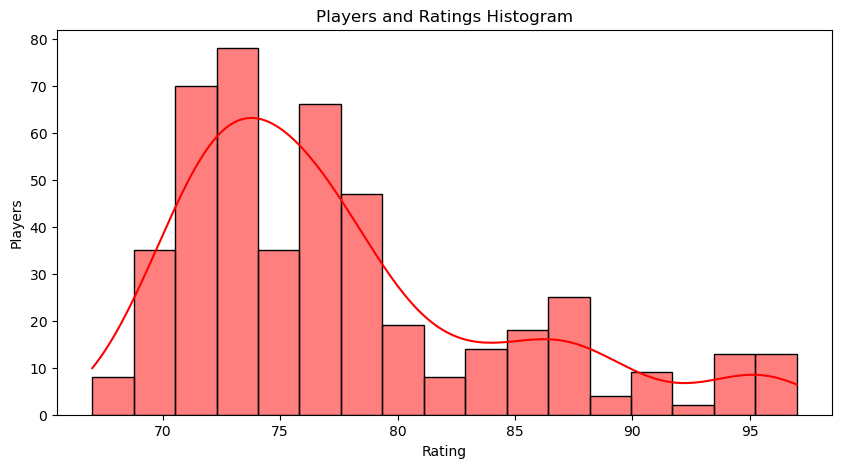

In [363]:
# Seaborn ile histogram oluşturma

plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins='auto', kde=True, color='red')
plt.xlabel('Rating')
plt.ylabel('Players')
plt.title('Players and Ratings Histogram')
plt.show()

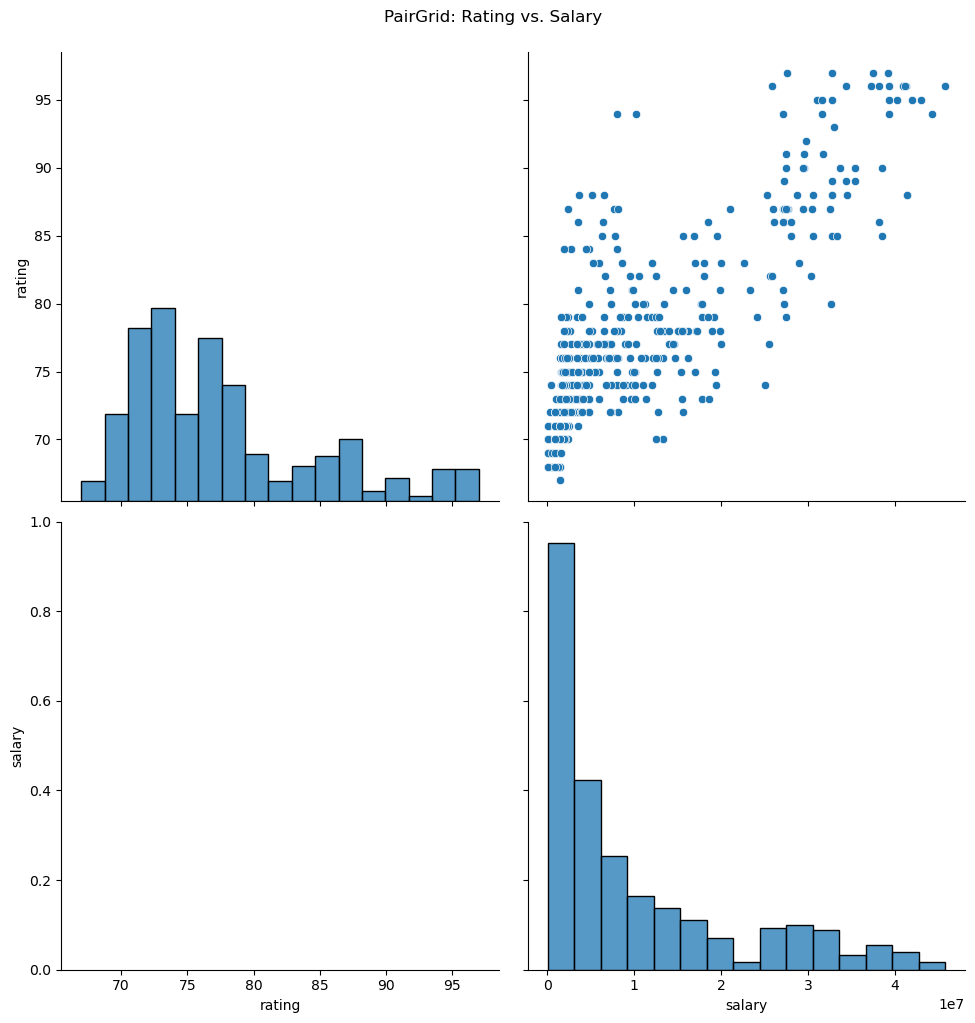

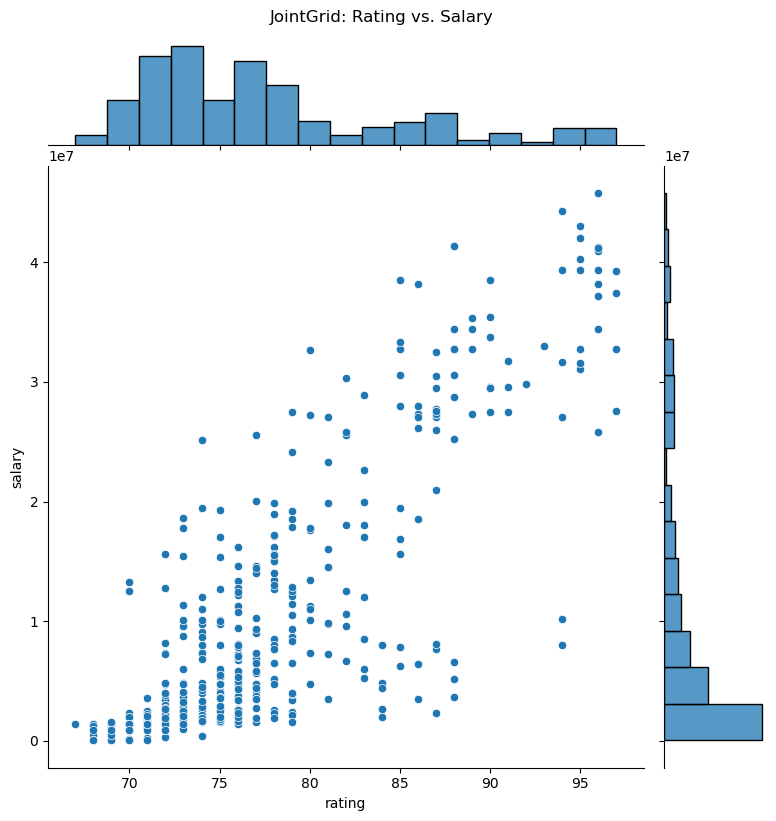

In [364]:
# Rating ve Salary için PairGrid ve JointGrid oluşturma
pair_data = data[['rating', 'salary']]

# Veri çerçevesindeki NaN (boş) değerleri temizleme
pair_data = pair_data.dropna()

pair_grid = sns.PairGrid(pair_data, height=5)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_diag(sns.histplot)
pair_grid.fig.suptitle('PairGrid: Rating vs. Salary', y=1.02)

joint_grid = sns.JointGrid(data=pair_data, x='rating', y='salary', height=8)
joint_grid.plot(sns.scatterplot, sns.histplot)
joint_grid.fig.suptitle('JointGrid: Rating vs. Salary', y=1.02)
plt.show()

In [365]:
#Regresyon analizi ile ratinglere göre ücret tahmininde bulunma

X = data['rating'].values.reshape(-1, 1)
y = data['salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

r2=r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


# Yeni sezon için rating'e göre ücret tahminleri
data_for_prediction = data[['rating', 'salary']].dropna()
new_ratings = data_for_prediction['rating'].values
new_salaries = model.predict(np.array(new_ratings).reshape(-1, 1))

# Tahminleri bir veri çerçevesine ekleyerek tablo oluşturma
prediction_table = pd.DataFrame({'New Rating': new_ratings, 'Predicted Salary': new_salaries})
prediction_table['Predicted Salary'] = prediction_table['Predicted Salary'].apply(lambda x: '{:,.2f}'.format(x))
display(prediction_table)

Mean Squared Error: 45727481055161.13
Mean Absolute Error: 4836962.313356111
Root Mean Squared Error: 6762209.776039274
R2 Score: 0.719164354122954


,New Rating,Predicted Salary
0,97,"36,492,729.36"
1,97,"36,492,729.36"
2,96,"35,147,738.80"
3,96,"35,147,738.80"
4,96,"35,147,738.80"
...,...,...
459,88,"24,387,814.27"
460,88,"24,387,814.27"
461,87,"23,042,823.71"
462,87,"23,042,823.71"


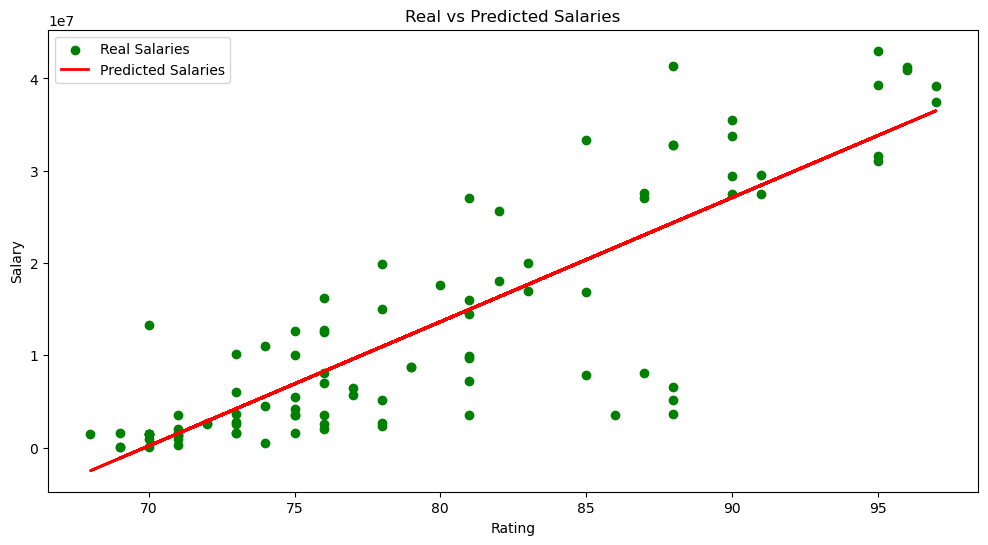

In [366]:
# Gerçek ve tahmini değerlere göre ücret tahmini grafik

plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color='green', label='Real Salaries')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salaries')

plt.title('Real vs Predicted Salaries')
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [367]:
# Oyuncuların performansla arttıkça aldıkları ücretlerinde arttığı görülmektedir.

In [368]:
# Burada version NBA2k20 baz alınıp o sezonda oynayan oyuncuların 2020 yılına göre ücretleri hesaplanmıştır.

def age_by_version(row):
    if row['version'] == 'NBA2k20':
        birth_date = row['b_day']
        if isinstance(birth_date, date):
            return 2020 - birth_date.year - ((2020, date.today().month, date.today().day) < (birth_date.month, birth_date.day, birth_date.year))
    return None  # Diğer durumlarda None döndür

data['b_day'] = pd.to_datetime(data['b_day'], format='%m/%d/%y')
data['age'] = data.apply(age_by_version, axis=1)

In [369]:
# En genç 10 oyuncu listesi.

data.sort_values(by = 'age', ascending = True)[['player_name', 'rating', 'team', 'age']].head(10)


,player_name,rating,team,age
403,Talen Horton-Tucker,70,Los Angeles Lakers,20.0
312,Sekou Doumbouya,73,Detroit Pistons,20.0
387,Darius Bazley,70,Oklahoma City Thunder,20.0
315,Nassir Little,73,Portland Trail Blazers,20.0
380,Alen Smailagic,71,Golden State Warriors,20.0
112,RJ Barrett,78,New York Knicks,20.0
137,Darius Garland,77,Cleveland Cavaliers,20.0
271,Jaxson Hayes,74,New Orleans Pelicans,20.0
72,Zion Williamson,81,New Orleans Pelicans,20.0
202,Coby White,76,Chicago Bulls,20.0


In [370]:
# En yaşlı 10 oyuncu listesi.

data.sort_values(by = 'age', ascending = False)[['player_name', 'rating', 'team', 'age']].head(10)

,player_name,rating,team,age
203,Pau Gasol,75,NaN,40.0
222,Kyle Korver,75,Milwaukee Bucks,39.0
282,Tyson Chandler,73,Houston Rockets,38.0
0,LeBron James,97,Los Angeles Lakers,36.0
87,JJ Redick,80,New Orleans Pelicans,36.0
167,Jose Juan Barea,76,Dallas Mavericks,36.0
123,Andre Iguodala,78,Miami Heat,36.0
48,Chris Paul,85,Oklahoma City Thunder,35.0
339,Anthony Tolliver,72,Memphis Grizzlies,35.0
63,Marc Gasol,82,Toronto Raptors,35.0


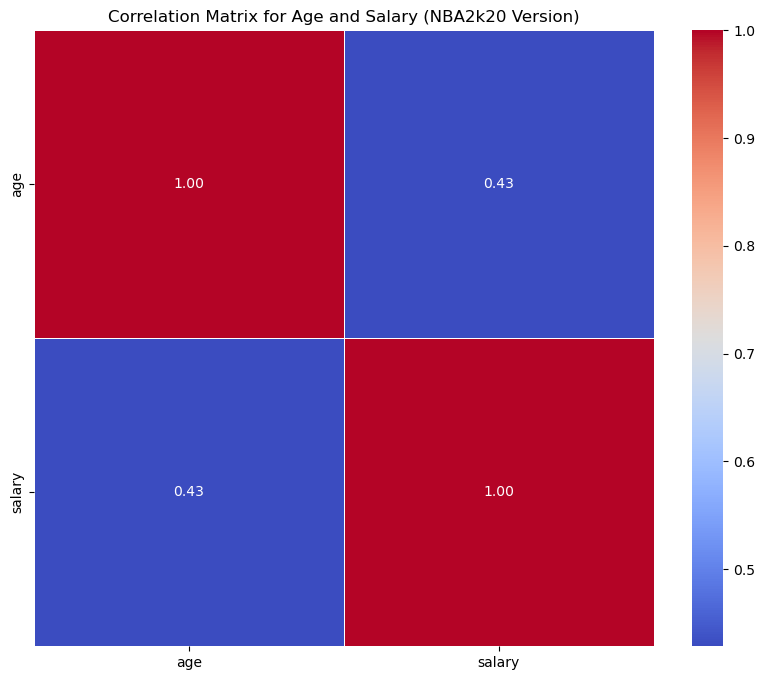

In [371]:
# NBA2k20 versiyonu baz alınarak oyuncuların yaş ve ücretleri için Correlation Matrix oluşturulmuştur.

nba2k20_data = data[data['version'] == 'NBA2k20']

age_salary_data_nba2k20 = nba2k20_data[['age', 'salary']].dropna()

correlation_matrix = age_salary_data_nba2k20.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix for Age and Salary (NBA2k20 Version)')
plt.show()

In [372]:
# 0.43'lük bir korelasyon katsayısı, yaş (age) ve ücret (salary) arasında orta derecede pozitif bir ilişkinin olduğunu gösterir. 
# Yani, genellikle oyuncuların yaşları arttıkça maaşlarının da arttığı bir eğilim vardır, ancak ilişki güçlü değildir. 
# Bu durumda, yaş ve ücret arasındaki ilişki istatistiksel olarak anlamlıdır, ancak çok güçlü değildir.

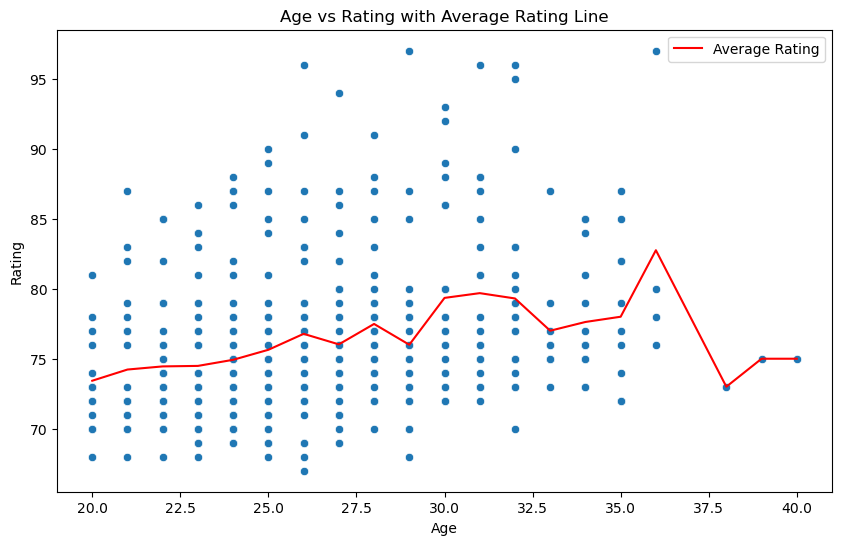

In [373]:
# Scatter plot ile yaş ve performans ilişkisi

age_rating_data = data[['age', 'rating']]
age_rating_avg = age_rating_data.groupby('age')['rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='rating', data=age_rating_data)

sns.lineplot(x='age', y='rating', data=age_rating_avg, color='red', label='Average Rating')

plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating with Average Rating Line')

plt.legend()
plt.show()

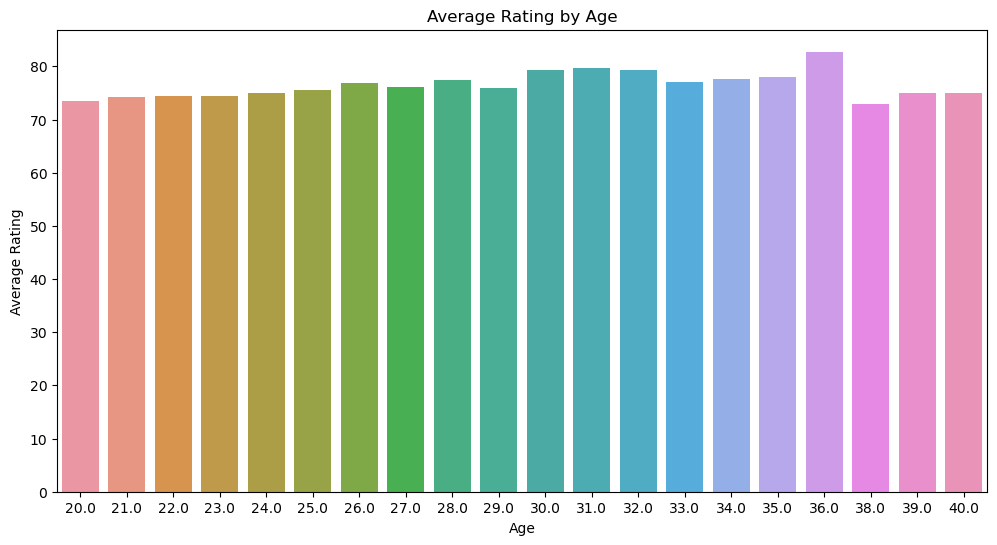

In [374]:
# Yaşa göre gruplanmış ortalama dereceyi gösteren bir çubuk grafiği de oluşturma.

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='rating', data=age_rating_avg)
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age')
plt.show()

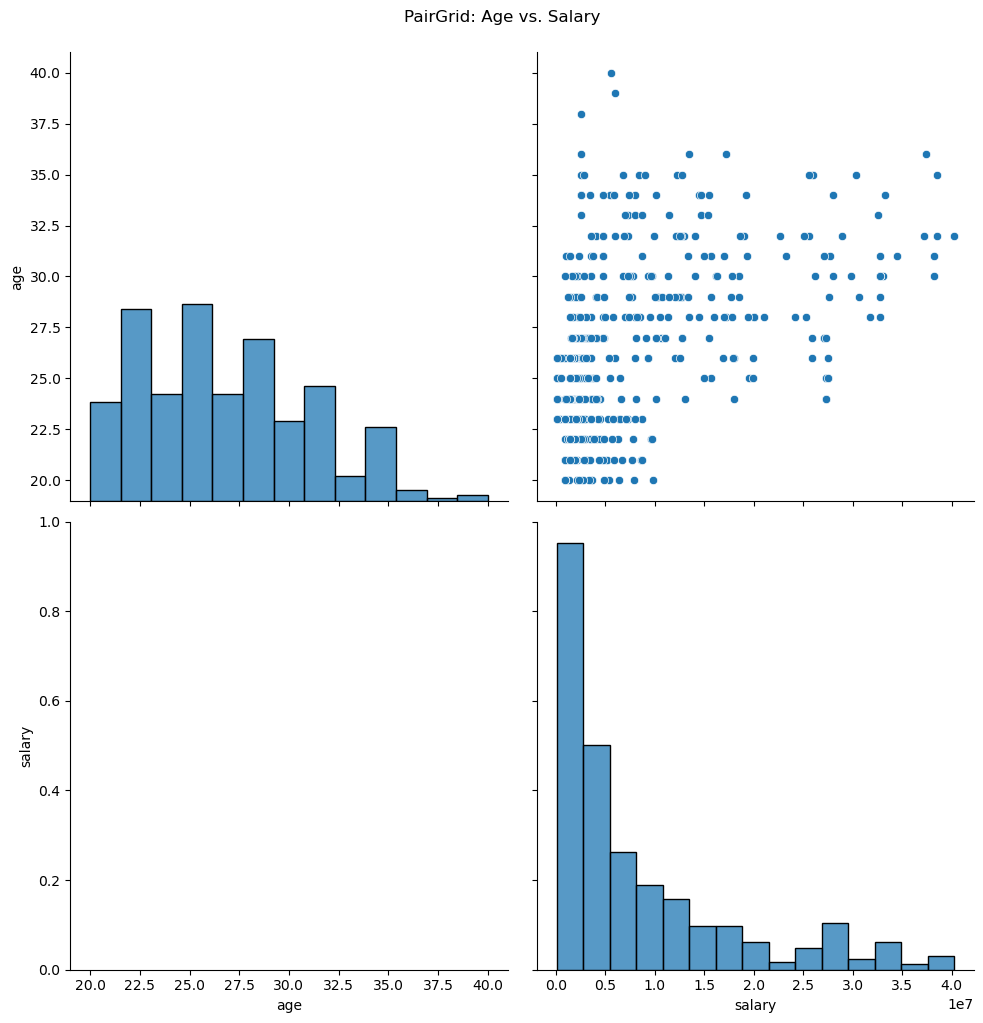

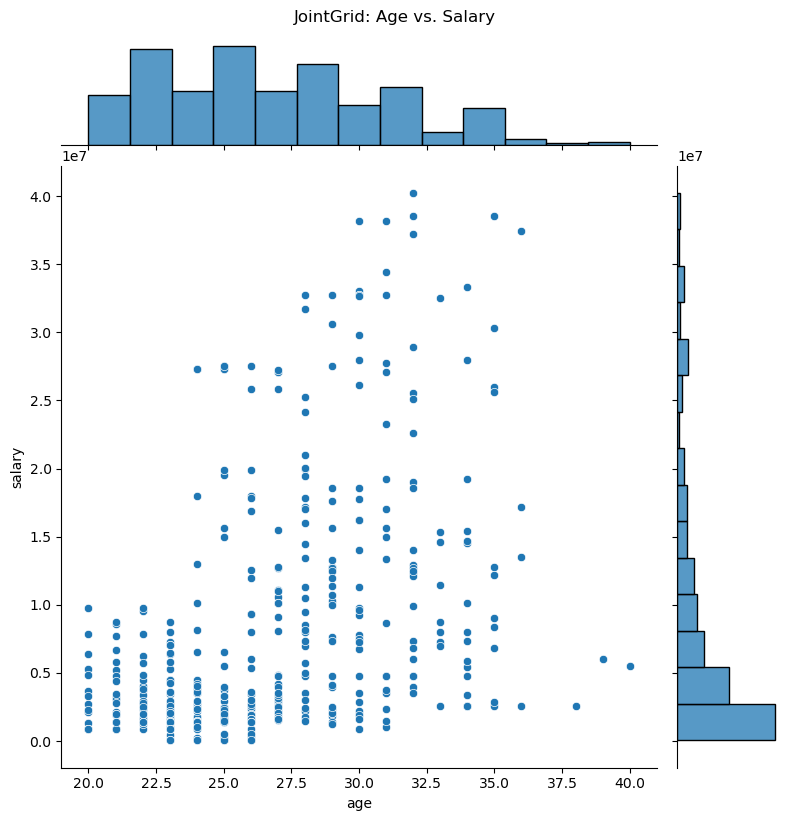

In [375]:
# Yaş ve ücret için PairGrid ve JointGrid oluşturma
pair_data = data[['age', 'salary']]
pair_data = pair_data.dropna()

# PairGrid oluşturma
pair_grid = sns.PairGrid(pair_data, height=5)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_diag(sns.histplot)
pair_grid.fig.suptitle('PairGrid: Age vs. Salary', y=1.02)

# JointGrid oluşturma
joint_grid = sns.JointGrid(data=pair_data, x='age', y='salary', height=8)
joint_grid.plot(sns.scatterplot, sns.histplot)
joint_grid.fig.suptitle('JointGrid: Age vs. Salary', y=1.02)
plt.show()

Mean Squared Error: 155346775569249.97
R2 Score: 0.04593668740948975


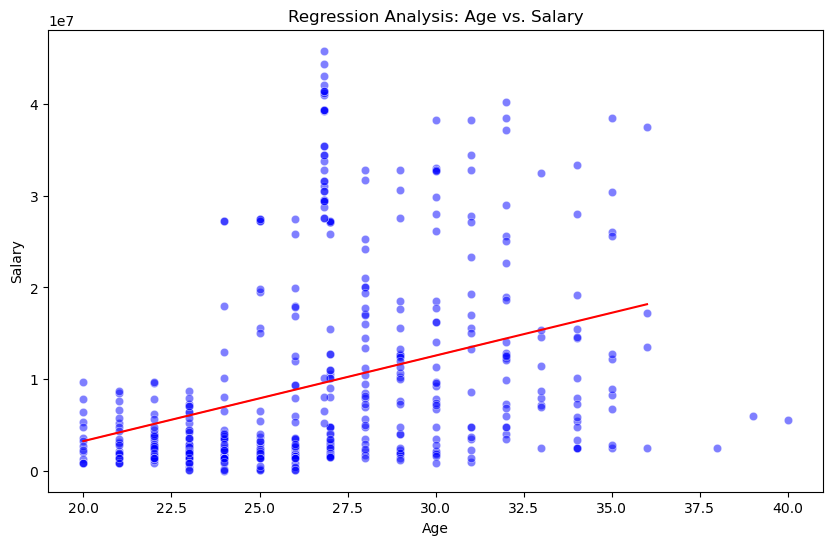

In [376]:
#Regresyon analizi ile agelere göre maaş tahmininde bulunma

data['age'].fillna(data['age'].mean(), inplace=True)
data['salary'].fillna(data['salary'].mean(), inplace=True)
X = data['age'].values.reshape(-1, 1)
y = data['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Modelin performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary', data=data, color='blue', alpha=0.5)
sns.lineplot(x=X_test.flatten(), y=y_pred, color='red')
plt.title('Regression Analysis: Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [377]:
unique_players = data.drop_duplicates(subset='player_name', keep='first')
country_counts = unique_players['country'].value_counts()
players_per_country = unique_players['country'].value_counts()
print(players_per_country)

country
USA                                 323
Canada                               15
Australia                             9
France                                8
Spain                                 6
Germany                               6
Croatia                               6
Serbia                                5
Turkey                                4
Italy                                 4
Latvia                                3
Nigeria                               3
Greece                                3
Brazil                                2
Democratic Republic of the Congo      2
Ukraine                               2
Lithuania                             2
Bosnia and Herzegovina                2
The Bahamas                           2
Cameroon                              2
Slovenia                              2
Philippines                           1
Dominican Republic                    1
Haiti                                 1
Angola                          

In [378]:
# Oyuncuların ülkelere göre dağılım oranları

country_count = data['country'].value_counts()
fig = go.Figure(go.Pie(labels=country_count.index, values=country_count.values, hole=0.4,textinfo= "none"))
fig.update_layout(title={
        'text': "Percentage of players by country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [379]:
# Çoğu NBA oyuncusunun ülkesi USA.

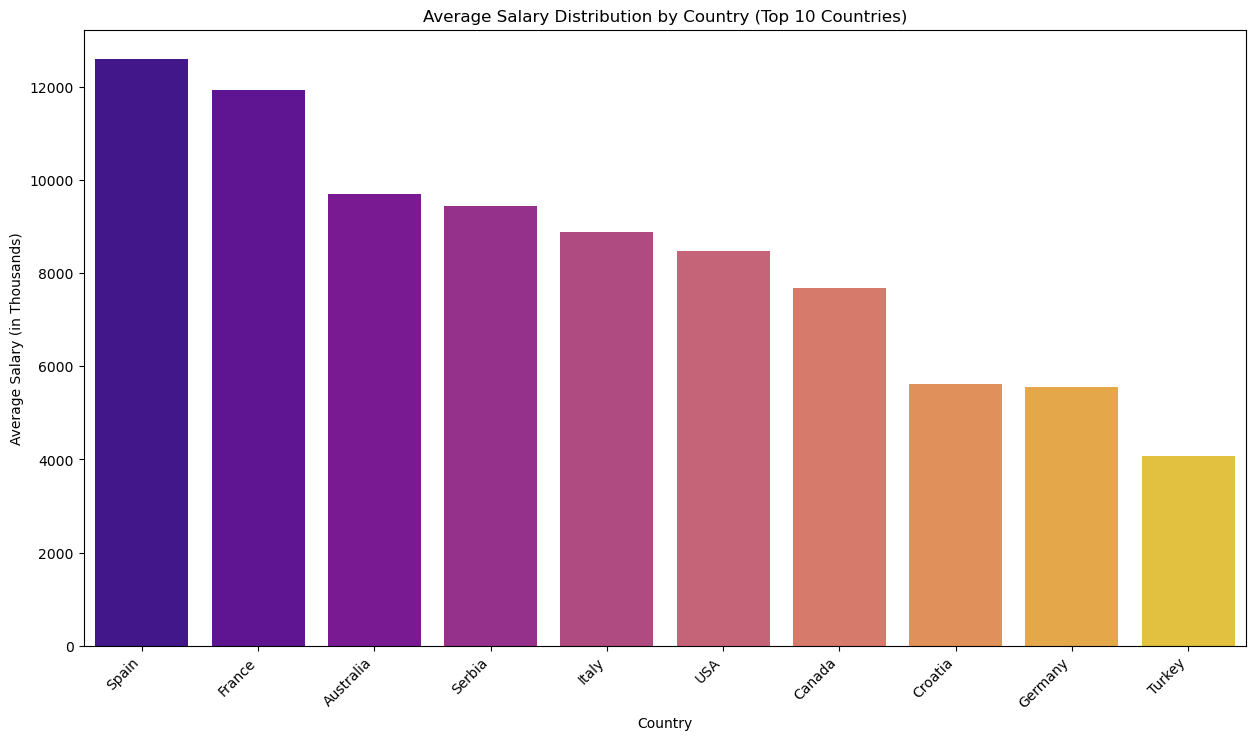

In [415]:
# En çok temsil edilen ilk 10 ülkeyi ortalama ücretlerine göre sıralama

top_countries = unique_players['country'].value_counts().nlargest(10).index
top_countries_data = unique_players[unique_players['country'].isin(top_countries)].copy()
top_countries_data.loc[:, 'salary_in_thousands'] = top_countries_data['salary'] / 1000
sorted_countries = top_countries_data.groupby('country')['salary_in_thousands'].mean().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.barplot(x='country', y='salary_in_thousands', data=top_countries_data, palette='plasma', order=sorted_countries, errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Salary (in Thousands)')
plt.title('Average Salary Distribution by Country (Top 10 Countries)')
plt.show()

In [381]:
data['college'].value_counts()

college
No College          76
Kentucky            28
Duke                25
UCLA                13
Texas               13
                    ..
Tennessee State      1
Norfolk State        1
Marshall             1
Long Beach State     1
Dayton               1
Name: count, Length: 110, dtype: int64

In [382]:
# En çok temsil edilen üniversiteler

top_colleges = data['college'].value_counts().nlargest(25)
display("Top 25 Colleges:")
display(top_colleges)

'Top 25 Colleges:'

college
No College        76
Kentucky          28
Duke              25
UCLA              13
Texas             13
North Carolina    13
Kansas            13
Arizona            9
Villanova          9
Michigan           8
Indiana            8
Wake Forest        7
Florida            7
USC                7
Michigan State     7
Washington         6
Iowa State         6
Texas A&M          5
Marquette          5
Tennessee          5
Gonzaga            5
Virginia           5
UConn              5
Louisville         5
Creighton          4
Name: count, dtype: int64

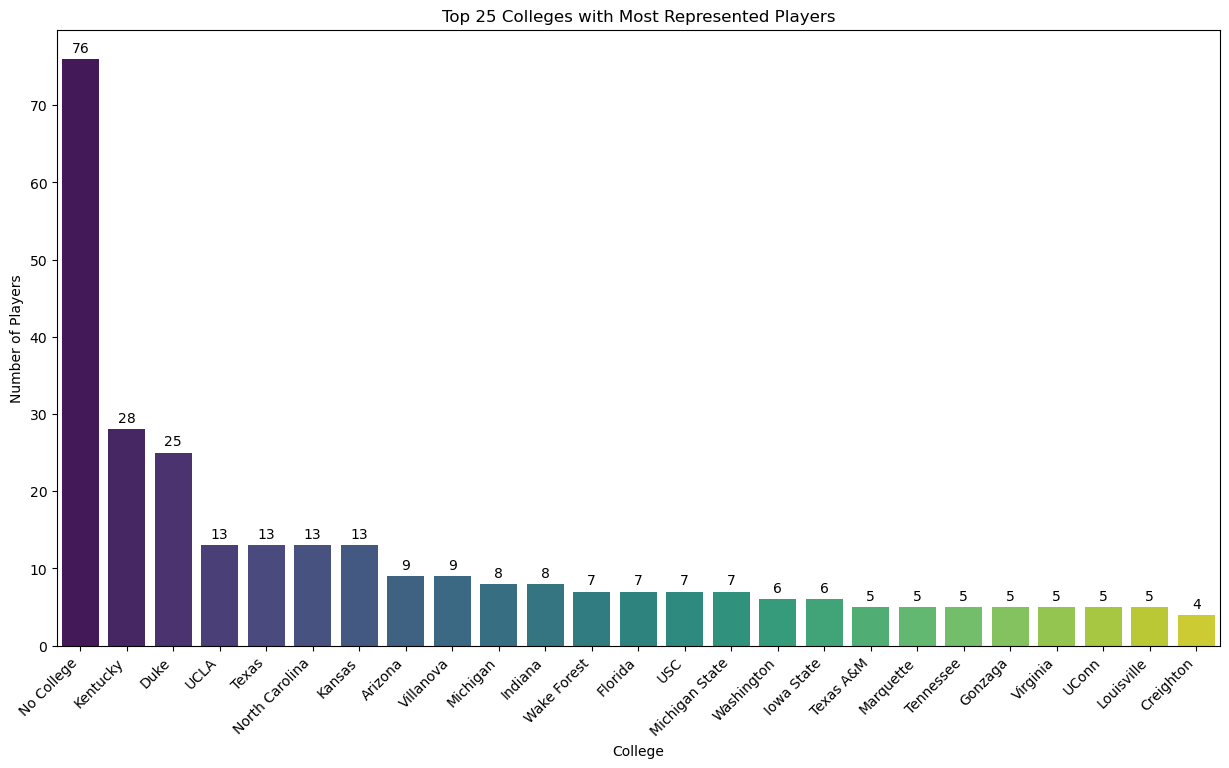

In [383]:
# En çok temsil edilen üniversiteler ve üniversiteye gitmeyenler

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.title('Top 25 Colleges with Most Represented Players')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

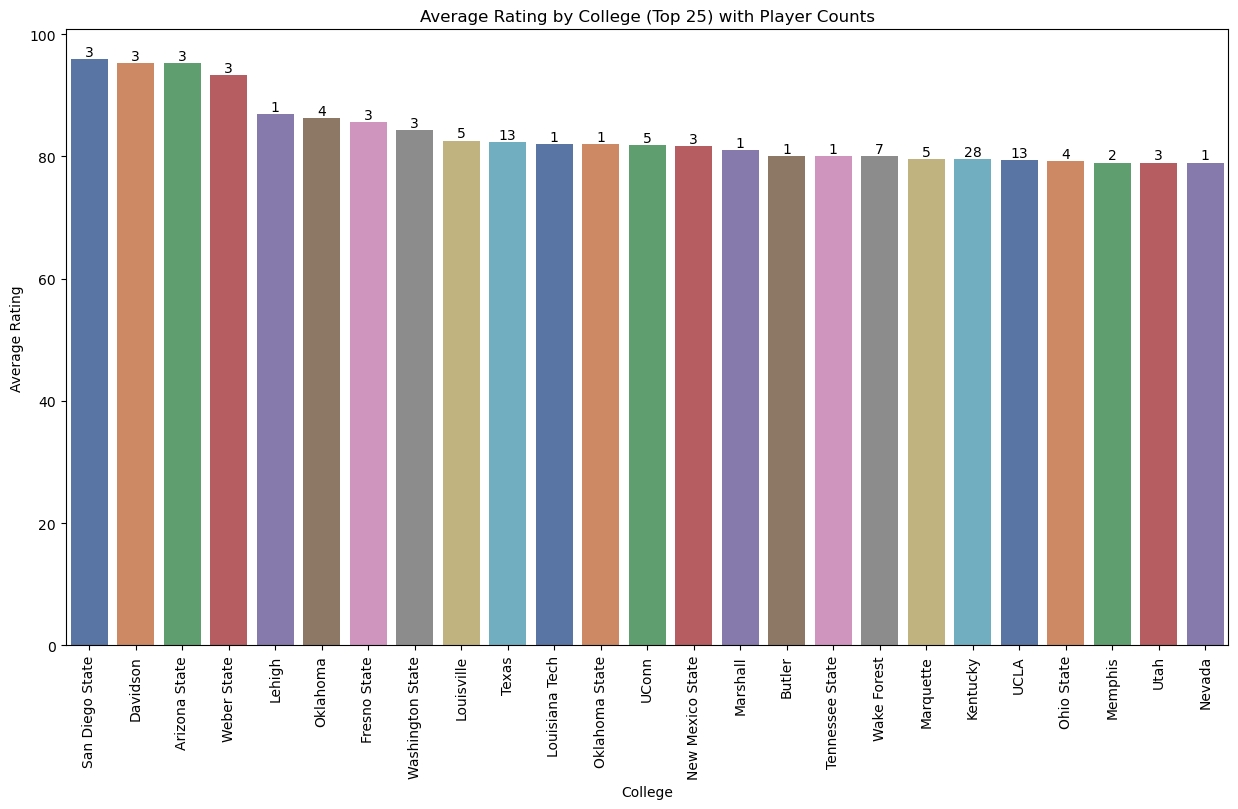

In [384]:
# Hangi kolejdeki oyuncuların performasları daha yüksektir ve oyuncu sayısı nedir? Performansları en yüksek ilk 25 kolej içerisinde.

college_stats = data.groupby('college').agg({'rating': 'mean', 'player_name': 'count'})
college_stats = college_stats.sort_values(by='rating', ascending=False).head(25)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=college_stats.index, y=college_stats['rating'], palette='deep')
plt.xticks(rotation=90)
plt.xlabel('College')
plt.ylabel('Average Rating')
plt.title('Average Rating by College (Top 25) with Player Counts')

for i, v in enumerate(college_stats['player_name']):
    ax.text(i, college_stats['rating'].iloc[i] + 0.01, str(v), ha='center', va='bottom', color='black')

plt.show()

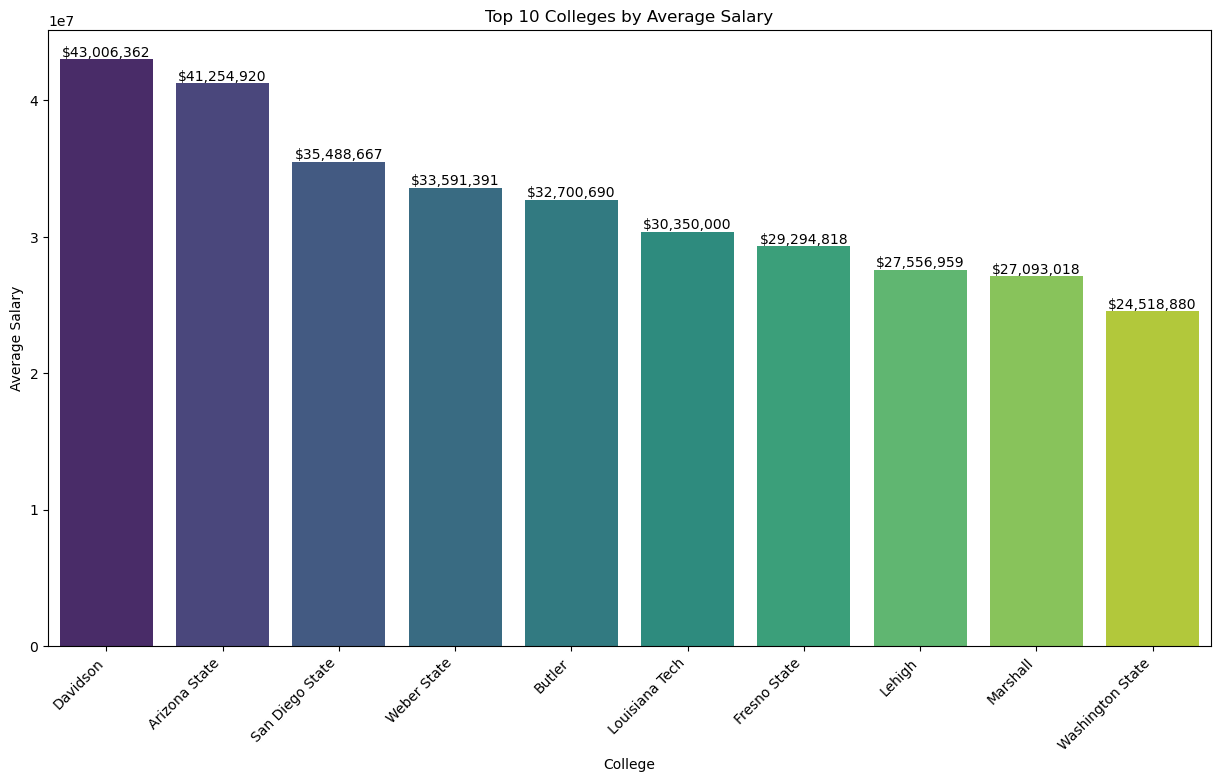

In [414]:
# Hangi kolejdeki oyuncuların ücretlerinin ortalaması en yüksektir?

top_colleges = data.groupby('college')['salary'].mean().nlargest(10).index

top_colleges_data = data[data['college'].isin(top_colleges)]

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='college', y='salary', data=top_colleges_data, palette='viridis', order=top_colleges, errorbar=None)

for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Average Salary')
plt.title('Top 10 Colleges by Average Salary')
plt.show()

In [417]:
# College'e gitmeyen oyuncuların ortalama maaşları

no_college_salary_mean = data[data['college'] == 'No College']['salary'].mean()
print(f"The average salary for players with 'No College' is: ${no_college_salary_mean:,.2f}")

The average salary for players with 'No College' is: $11,544,849.80


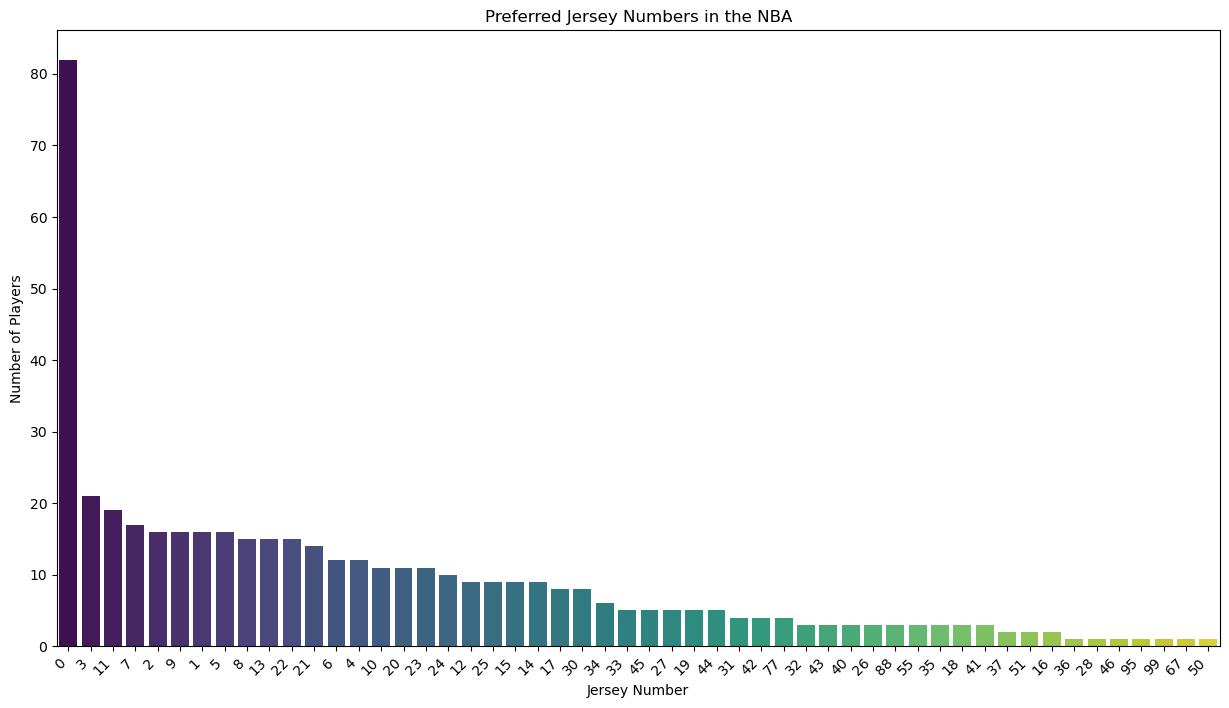

In [385]:
# Forma numaralarına göre oyuncu sayısı

jersey_data = data['jersey']

jersey_counts = jersey_data.value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=jersey_counts.index, y=jersey_counts.values, palette="viridis")
plt.xlabel('Jersey Number')
plt.ylabel('Number of Players')
plt.title('Preferred Jersey Numbers in the NBA')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [386]:
# Forma numarası 0 olan ve takım adı boş olan oyuncuların listesi

players_with_jersey_0_and_empty_team = data[(data['jersey'] == '0') & (data['team'].isnull())]
player_names_with_jersey_0_and_empty_team = players_with_jersey_0_and_empty_team['player_name'].tolist()


print("Players with Jersey Number 0 and Empty Team:")
for player_name in player_names_with_jersey_0_and_empty_team:
    print(player_name)
    
    
# Burada "0" forma numarası veri setinde 22 serbest oyuncunun kayıtlı olduğunu görüyoruz, bu da neden "0" forma numarasına sahip bu kadar çok oyuncunun bulunduğunu açıklıyor.

Players with Jersey Number 0 and Empty Team:
DeMarcus Cousins
Michael Beasley
Gerald Green
Isaiah Thomas
Pau Gasol
Allonzo Trier
Chandler Parsons
Ivan Rabb
Allen Crabbe
CJ Miles
Jonathon Simmons
Antonio Blakeney
Tim Frazier
Deyonta Davis
Tyler Lydon
Miles Plumlee
Jemerrio Jones
Yante Maten
Henry Ellenson
Amile Jefferson
Tyrone Wallace
Isaiah Hartenstein


In [387]:
# Forma numarası 0 olan ve takım adı boş olan oyuncuların listesinde takım kısmına off_season (sezon dışı) yazdırma

players_with_jersey_0_and_empty_team = data[(data['jersey'] == '0') & (data['team'].isnull())]
player_names_with_jersey_0_and_empty_team = players_with_jersey_0_and_empty_team['player_name'].tolist()

data.loc[data['player_name'].isin(player_names_with_jersey_0_and_empty_team), 'team'] = 'off_season'

display(data.head())

,player_name,rating,jersey,team,position,b_day,height_m,weight_kg,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858.0,USA,2003,1,1,No College,NBA2k20,36.0
1,Kawhi Leonard,97,2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000.0,USA,2011,1,15,San Diego State,NBA2k20,29.0
2,Giannis Antetokounmpo,96,34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,25842697.0,Greece,2013,1,15,No College,NBA2k20,26.0
3,Kevin Durant,96,7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000.0,USA,2007,1,2,Texas,NBA2k20,32.0
4,James Harden,96,13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000.0,USA,2009,1,3,Arizona State,NBA2k20,31.0


In [388]:
# "team" kısmında "off_season" yazan oyuncuları filtreleme

off_season_players = data[data['team'] == 'off_season'][['player_name', 'team']]
display(off_season_players)

,player_name,team
33,DeMarcus Cousins,off_season
168,Michael Beasley,off_season
177,Gerald Green,off_season
198,Isaiah Thomas,off_season
203,Pau Gasol,off_season
237,Allonzo Trier,off_season
264,Chandler Parsons,off_season
266,Ivan Rabb,off_season
283,Allen Crabbe,off_season
294,CJ Miles,off_season


In [389]:
# Forma numarası 0 olan ve bir takımda oynayan oyuncuların listesi

players_with_jersey_0_and_team = data[(data['jersey'] == '0') & (~data['team'].isnull())]

player_names_with_jersey_0_and_team = players_with_jersey_0_and_team['player_name'].tolist()

print("Players with Jersey Number 0 and Playing for a Team:")
for player_name in player_names_with_jersey_0_and_team:
    print(player_name)

Players with Jersey Number 0 and Playing for a Team:
Damian Lillard
Russell Westbrook
D'Angelo Russell
DeMarcus Cousins
Andre Drummond
Jayson Tatum
Kyle Kuzma
Kevin Love
Aaron Gordon
Reggie Jackson
Josh Richardson
Willie Cauley-Stein
Marcus Morris
Jabari Parker
Jeff Teague
Justise Winslow
Malik Beasley
DeMarre Carroll
Alex Len
Trevor Ariza
Michael Beasley
Miles Bridges
Dewayne Dedmon
Gorgui Dieng
Gerald Green
Michael Kidd-Gilchrist
Meyers Leonard
Isaiah Thomas
Coby White
Pau Gasol
James Johnson
Rodions Kurucs
Shabazz Napier
Noah Vonleh
Allonzo Trier
Jordan Bell
Moe Harkless
Tyler Johnson
Joakim Noah
Chandler Parsons
Ivan Rabb
Jonah Bolden
Alec Burks
Allen Crabbe
James Ennis
CJ Miles
David Nwaba
Jonathon Simmons
Omari Spellman
Antonio Blakeney
Donte DiVincenzo
Tim Frazier
Brandon Knight
Cameron Payne
Anthony Tolliver
Alfonzo McKinnie
Nicolas Claxton
Ryan Broekhoff
De'Anthony Melton
Nickeil Alexander-Walker
Deyonta Davis
Jacob Evans
Keita Bates-Diop
Skal Labissiere
Tyler Lydon
Miles Plum

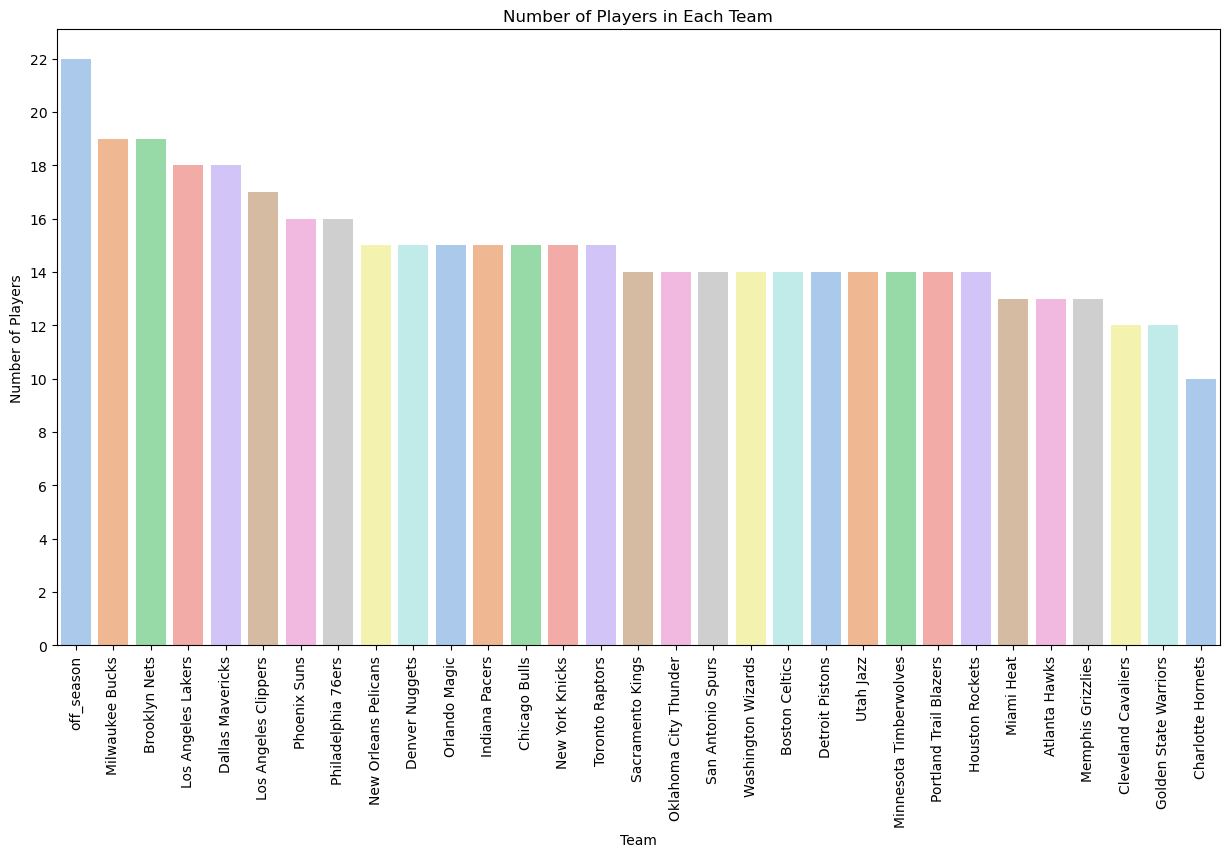

In [390]:
# Takımlardaki oyuncu sayısı ve sezon dışı kalan oyuncu sayısı

team_player_counts = data['team'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=team_player_counts.index, y=team_player_counts.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each Team')


plt.yticks(range(0, max(team_player_counts.values)+1, 2), [str(i) for i in range(0, max(team_player_counts.values)+1, 2)])

plt.show()

In [391]:
# Veri setindeki pozisyonlardaki oyuncu sayıları

data['position'].value_counts()

position
G      184
F      146
C       53
F-C     39
G-F     21
F-G     15
C-F      6
Name: count, dtype: int64

In [392]:
# Oyuncuların pozisyon ve yaşlarına göre aldıkları ücretleri inceleme

# Pozisyonları düzenleme (örneğin, F-C ve C-F'yi F-C olarak birleştirme)

data['position'] = data['position'].replace({'C-F': 'F-C', 'G-F': 'F-G'})
filtered_data = data[(data['salary'] > 20000000) & (data['age'] > 20)]

fig = px.scatter(filtered_data.sort_values(by='salary', ascending=False)[:50], 
                x="salary", y="age",
                size="rating", color="position", 
                title="Top-50 players with Salary > 20M and Age > 20",
                log_x=True, size_max=20)
fig.show()

In [393]:
# En fazla ücret alan oyuncular çoğunlukla G ve F pozisyonlarında oynuyor.

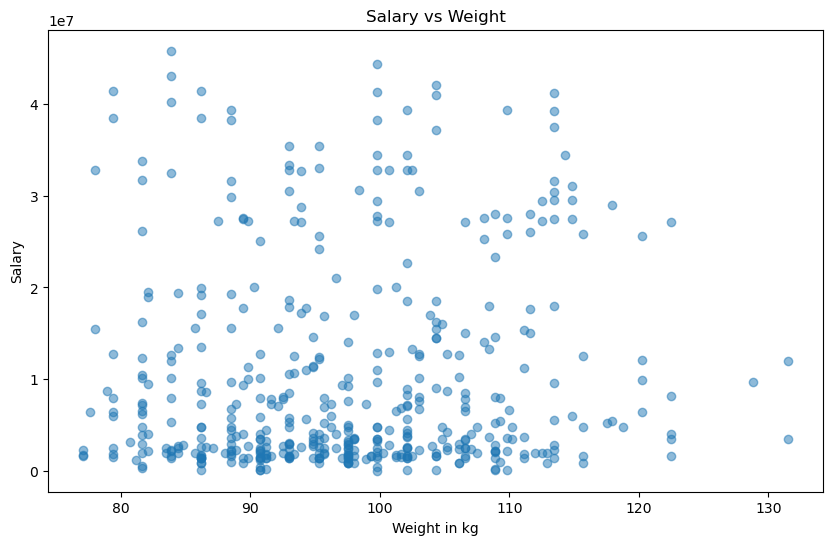

In [394]:
plt.figure(figsize=(10, 6))
plt.scatter(data['weight_kg'], data['salary'], alpha=0.5)
plt.title('Salary vs Weight')
plt.xlabel('Weight in kg')
plt.ylabel('Salary')
plt.show()

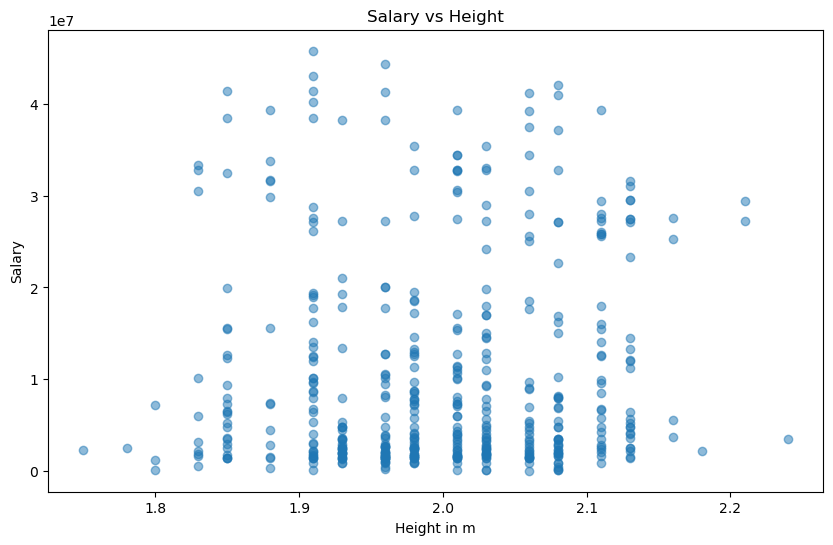

In [395]:
plt.figure(figsize=(10, 6))
plt.scatter(data['height_m'], data['salary'], alpha=0.5)
plt.title('Salary vs Height')
plt.xlabel('Height in m')
plt.ylabel('Salary')
plt.show()

Correlation between features on a heatmap

In [396]:
data['draft_round'] = data['draft_round'].apply(lambda x: 0 if x=='Undrafted' else int(x)) 
data['draft_peak'] = data['draft_peak'].apply(lambda x: 0 if x=='Undrafted' else int(x))
data['jersey'] = data['jersey'].str.replace('#', '').astype(int)


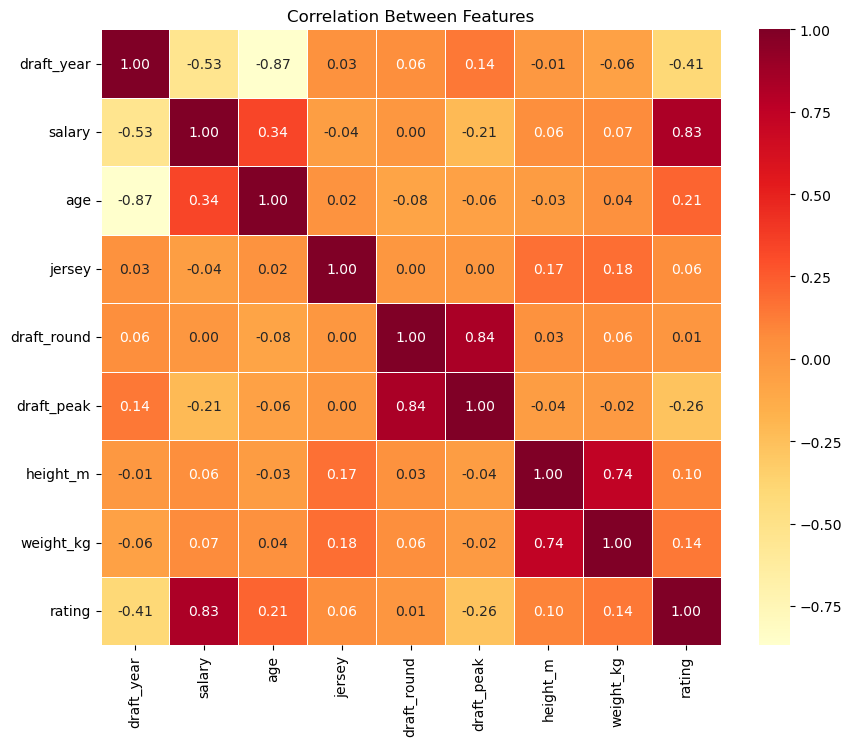

In [397]:
# Correlation between features on a heatmap

numeric_columns = data.select_dtypes(include=['number']).columns
selected_columns = ['rating', 'jersey', 'height_m', 'weight_kg', 'salary', 'age', 'draft_year', 'draft_round', 'draft_peak']
numeric_selected_columns = list(set(selected_columns) & set(numeric_columns))

selected_data = data[numeric_selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)

plt.title('Correlation Between Features')
plt.show()

In [398]:
# 1. sırada korelasyon draft round ve draft peak - 0,84
# 2. sırada salary ve rating - 0,83
# 3. sırada weight ve height - 0,74

draft_round ve draft_peak arasındaki en yüksek korelasyon: Bu durum, bir oyuncunun draft sırası ve draft'ta hangi sırada seçildiği arasında bir ilişkinin olduğunu gösterir. Yani, eğer bir oyuncu daha yüksek bir turda (draft_round) seçilmişse, muhtemelen daha yüksek bir sırayla (draft_peak) seçilmiştir. Bu durum genellikle beklenen bir durumdur, çünkü yüksek turlardaki oyuncular genellikle öncelikli olarak seçilir.

weight ve height arasındaki yüksek korelasyon: Bu durum, ağırlık (weight) ile boy (height) arasında bir ilişki olduğunu gösterir. Yüksek oyuncular genellikle daha ağırdır, ancak bu genelleme her zaman doğru değildir. Bu durumda, iki değişken arasındaki korelasyonun yüksek olması, genelde boy arttıkça ağırlığın da artma eğiliminde olduğunu gösterir.

salary ve rating arasındaki yüksek korelasyon: Bu durum, bir oyuncunun maaşı (salary) ile derecelendirmesi (rating) arasında bir ilişki olduğunu gösterir. Yani, genellikle daha yüksek derecelendirme alan oyuncuların daha yüksek maaş alması beklenir. Ancak, bu durum da her zaman geçerli değildir, çünkü birçok faktör (performans, deneyim, kontrat durumu vb.) maaşı etkileyebilir.

In [399]:
# Bu, oyuncuların pozisyona göre derecelendirilmesine dayalı maaş tahmini için basit regresyon grafikleridir.

data['position'] = data['position'].replace({'C-F': 'F-C', 'G-F': 'F-G'})
filtered_data = data[data['position'].isin(['F-C', 'F-G', 'C', 'F', 'G'])]

fig = px.scatter(
    filtered_data, x='rating', y='salary', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', 
    facet_col='position', facet_col_wrap=3, color='salary'
)
fig.show()

In [400]:
# G ve F pozisyonlarında oynayan oyuncuların ücretleri daha fazladır.

In [401]:
unique_draft_round_values = data['draft_round'].unique()
print(unique_draft_round_values)

[1 2 0]


In [402]:
zero_draft_round_players = data[data['draft_round'] == 0]
print(zero_draft_round_players)

              player_name  rating  jersey                  team position  \
81       Robert Covington      80      33       Houston Rockets        F   
101            Joe Ingles      79       2             Utah Jazz        F   
109         Fred VanVleet      79      23       Toronto Raptors        G   
121        JaMychal Green      78       4  Los Angeles Clippers        F   
167       Jose Juan Barea      76       5      Dallas Mavericks        G   
..                    ...     ...     ...                   ...      ...   
420        Malcolm Miller      69      13       Toronto Raptors        F   
424       Brandon Goodwin      68       0         Atlanta Hawks        G   
426  Kostas Antetokounmpo      68      37    Los Angeles Lakers        F   
427          Jalen Lecque      68       0          Phoenix Suns        G   
428       Duncan Robinson      67      55            Miami Heat        F   

         b_day  height_m  weight_kg      salary      country  draft_year  \
81  1990-12

In [403]:
# Draft round ve Salary

fig = px.box(data, x="draft_round", y="salary", 
            color="draft_round",
            title='Salary exploring by draft_round',
            points='all'
            )
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [404]:
# Draft'ta 1. turda seçilen oyuncuların maaşları seçilmeyen ya da 2. turda seçilen oyunculara kıyasla daha yüksektir.

In [405]:
print(data.columns)

Index(['player_name', 'rating', 'jersey', 'team', 'position', 'b_day',
       'height_m', 'weight_kg', 'salary', 'country', 'draft_year',
       'draft_round', 'draft_peak', 'college', 'version', 'age'],
      dtype='object')


In [406]:
# 'college', 'player_name', 'b_day', 'jersey', 'team', 'version', 'draft_year' drop edildi.
# rating, position, height, weight, salary, country, draft_round, draft_peak,'team','version'
'college', 'full_name', 'b_day', 'jersey', 'draft_peak'



('college', 'full_name', 'b_day', 'jersey', 'draft_peak')

In [407]:
label_encoder = LabelEncoder()
data['position'] = label_encoder.fit_transform(data['position'])
data['team'] = label_encoder.fit_transform(data['team'])
data['country'] = label_encoder.fit_transform(data['country'])
data['version'] = label_encoder.fit_transform(data['version'])
data['draft_year'] = label_encoder.fit_transform(data['draft_year'])

In [408]:
selected_columns = ['rating', 'position', 'height_m', 'weight_kg', 'salary', 'country', 'age', 'draft_year','draft_peak', 'draft_round', 'team']
y, X = data['salary'], data[selected_columns].drop('salary', axis=1)

X = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = MLPRegressor(random_state=0, 
                    hidden_layer_sizes=(64, 64, 64, 120),
                    alpha=0.001,
                    solver='lbfgs',
                    learning_rate='invscaling', 
                    learning_rate_init=1e-5,
                    max_iter=10000).fit(X_train, y_train)

y_predict = regr.predict(X_test)

print('Mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('Score: ', regr.score(X_test, y_test))

Mean squared error:  6129744.306890725
Score:  0.7023030967746418


In [409]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(len(y_predict))), y=y_predict,
                        mode='lines',
                        name='Prediction'))
fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test,
                        mode='lines',
                        name='True value'))

fig.show()